# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [124]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Trainees - المتدربين/Week 4/4- Deep learning/1-Weekly Task/Datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Trainees - المتدربين/Week 4/4- Deep learning/1-Weekly Task/Datasets


In [125]:
df = pd.read_csv('Traffic_Accidents.csv')

In [126]:
df_copy = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [127]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [128]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [129]:
df.sample()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
43720,320110.0,126690.0,-3.140759,51.033939,52,2.0,2,3.0,14/09/2009,2,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2009


In [130]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [235]:
df.duplicated().sum()

47

In [131]:
df.shape

(52000, 26)

In [132]:
for col in df.columns:
  print(df[col].value_counts())

Location_Easting_OSGR
531890.0    16
533650.0    15
531220.0    14
530980.0    13
533370.0    13
            ..
309450.0     1
575400.0     1
503208.0     1
457720.0     1
456682.0     1
Name: count, Length: 30693, dtype: int64
Location_Northing_OSGR
181190.0    19
181310.0    17
180920.0    15
179690.0    15
181110.0    14
            ..
310945.0     1
489909.0     1
150650.0     1
809700.0     1
127058.0     1
Name: count, Length: 32580, dtype: int64
Longitude
-0.100610    5
-0.096159    4
-0.570203    4
-2.948497    4
-0.044780    3
            ..
-5.307961    1
 0.036592    1
-1.505472    1
-1.612575    1
-1.212104    1
Name: count, Length: 50901, dtype: int64
Latitude
51.515721    5
53.211710    4
53.404118    4
51.570594    4
51.371165    3
            ..
54.017044    1
50.123692    1
51.544534    1
55.009095    1
51.565050    1
Name: count, Length: 50701, dtype: int64
Police_Force
1     7813
20    2047
6     2004
13    1925
43    1925
46    1644
44    1592
4     1557
50    1445


In [133]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [134]:
df['Accident_Severity'].unique()

array([ 3.,  1., nan,  2.])

In [135]:
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0])

In [136]:
df['Number_of_Casualties'].unique()

array([ 1.,  2.,  3., nan,  4.,  9.,  7.,  8.,  5.,  6., 42., 14., 12.,
       10., 13., 24., 51., 18., 11., 23.])

In [137]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mode()[0])

In [138]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])

In [139]:
df['Urban_or_Rural_Area'].unique()

array([2., 1., 3.])

In [140]:
df['Light_Conditions'].unique()

array(['Darkeness: No street lighting',
       'Darkness: Street lights present and lit',
       'Daylight: Street light present', nan,
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [141]:
df['Light_Conditions'] = df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            52000 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         52000 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [143]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.838154,1.834327,1.347654,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.358788,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.401537,0.727856,0.848073,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479690,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [144]:
df['Date'].unique()

array(['27/11/2009', '10/10/2010', '14/09/2005', ..., '24/03/2013',
       '25/02/2009', '03/02/2013'], dtype=object)

In [145]:
# convert to datetime using pd.to_datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-145-a8c4b8e0cb0a>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        52000 non-null  float64       
 1   Location_Northing_OSGR                       52000 non-null  float64       
 2   Longitude                                    52000 non-null  float64       
 3   Latitude                                     52000 non-null  float64       
 4   Police_Force                                 52000 non-null  int64         
 5   Accident_Severity                            52000 non-null  float64       
 6   Number_of_Vehicles                           52000 non-null  int64         
 7   Number_of_Casualties                         52000 non-null  float64       
 8   Date                                         52000 non-null  datetime64[ns]


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        52000 non-null  float64       
 1   Location_Northing_OSGR                       52000 non-null  float64       
 2   Longitude                                    52000 non-null  float64       
 3   Latitude                                     52000 non-null  float64       
 4   Police_Force                                 52000 non-null  int64         
 5   Accident_Severity                            52000 non-null  float64       
 6   Number_of_Vehicles                           52000 non-null  int64         
 7   Number_of_Casualties                         52000 non-null  float64       
 8   Date                                         52000 non-null  datetime64[ns]


In [148]:
df['Local_Authority_(District)'].unique()

array([556,  26, 746,  84, 257, 363, 146, 148, 917, 228, 307, 129, 203,
       112, 462, 206, 182,  20, 364, 306,  32, 742,  90, 563, 433, 355,
       471, 517, 150,  10, 102, 109,   6, 544, 406,  85, 394, 926, 438,
       309, 645, 923, 400, 186, 270, 421, 539, 500, 496, 395, 543,  33,
       321, 322, 279, 251, 114, 554, 470,   3, 285, 633, 536, 460,  15,
       345, 200, 243, 415, 302, 300,  19, 479, 591,  30, 940,   7, 386,
       280, 256,   1,  28, 585, 351, 420, 570,   4, 139,  22,  18,  91,
       743, 290, 606, 128, 612, 184, 204, 514, 745, 252, 605, 937, 624,
       929,  13,  40, 354, 215, 938, 437,  27, 623, 477, 538, 911,  31,
        76, 213, 340, 100, 454, 541, 918, 531,  92, 583, 558, 511, 346,
       286, 341,  11, 255, 277, 513, 211, 407, 516, 596, 181, 185, 390,
       931,  75, 463, 384, 750, 565, 608, 130, 533, 147, 586, 601, 559,
       274, 481, 328,  60, 939,  79, 935, 258, 413, 240, 564, 510,  21,
       126, 123, 452,  16, 492, 540, 635,  83, 934, 915, 634, 25

In [149]:
df = df.drop('Local_Authority_(Highway)', axis = 1)

In [150]:
df['Pedestrian_Crossing-Human_Control'].unique()


for col in df.columns:
  if df[col].dtype == object:
    print(col, df[col].value_counts())

Road_Type Road_Type
Single carriageway    38852
Dual carriageway       7737
Roundabout             3475
One way street         1099
Slip road               542
Unknown                 295
Name: count, dtype: int64
Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Human_Control
None within 50 metres                 51718
Control by other authorised person      163
Control by school crossing patrol       119
Name: count, dtype: int64
Pedestrian_Crossing-Physical_Facilities Pedestrian_Crossing-Physical_Facilities
No physical crossing within 50 meters          43368
Pedestrian phase at traffic signal junction     3455
non-junction pedestrian crossing                2669
Zebra crossing                                  1429
Central refuge                                   924
Footbridge or subway                             155
Name: count, dtype: int64
Light_Conditions Light_Conditions
Daylight: Street light present               38278
Darkness: Street lights present and lit      10130


In [151]:
df = df.drop('Pedestrian_Crossing-Human_Control', axis = 1)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        52000 non-null  float64       
 1   Location_Northing_OSGR                       52000 non-null  float64       
 2   Longitude                                    52000 non-null  float64       
 3   Latitude                                     52000 non-null  float64       
 4   Police_Force                                 52000 non-null  int64         
 5   Accident_Severity                            52000 non-null  float64       
 6   Number_of_Vehicles                           52000 non-null  int64         
 7   Number_of_Casualties                         52000 non-null  float64       
 8   Date                                         52000 non-null  datetime64[ns]


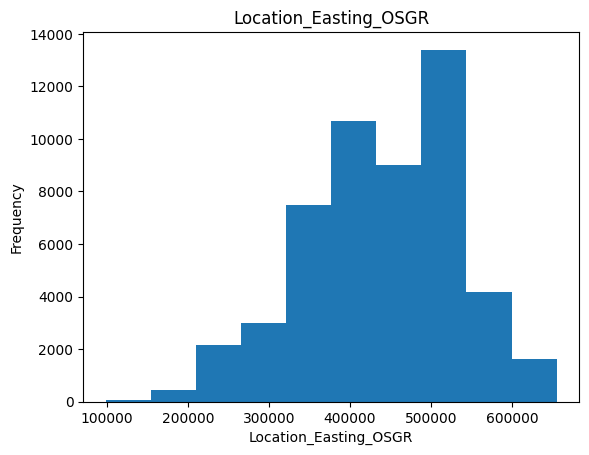

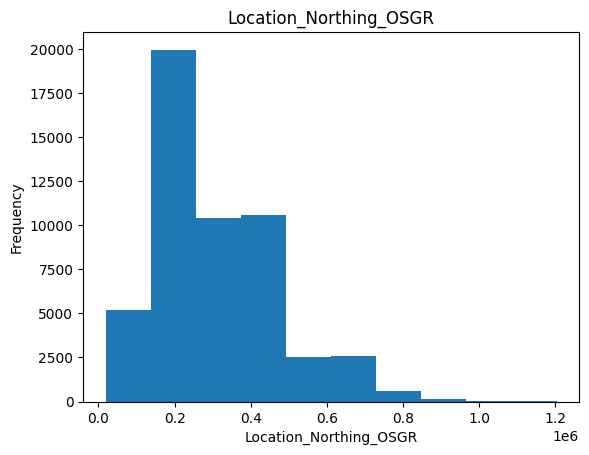

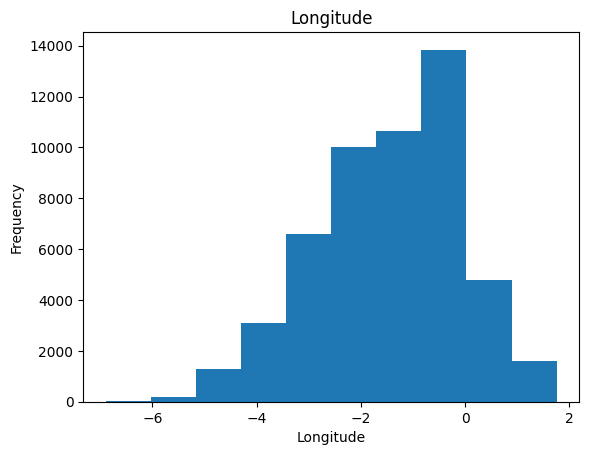

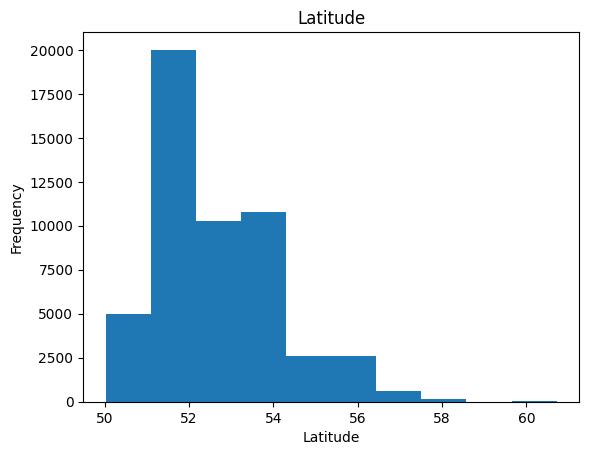

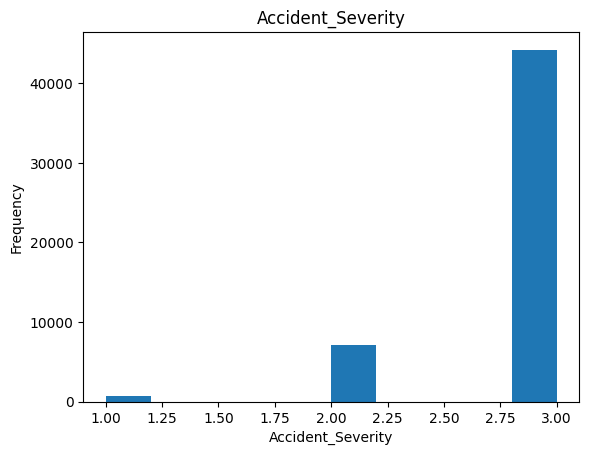

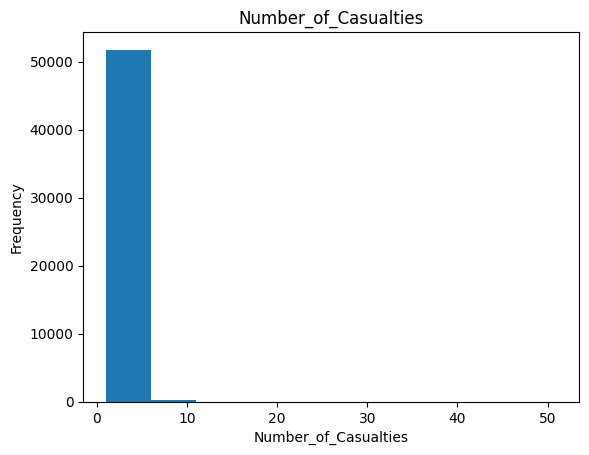

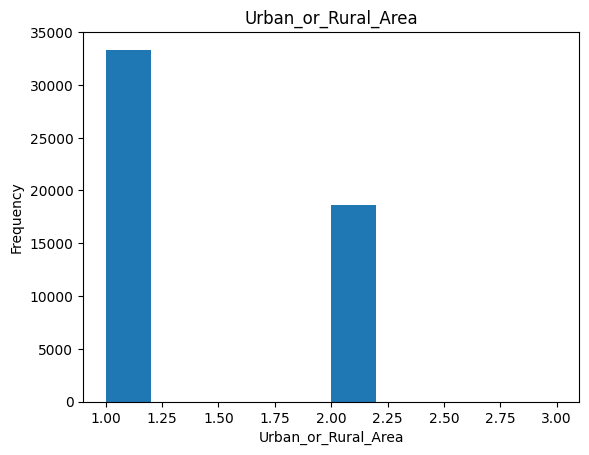

In [153]:
for col in df.columns:
  if df[col].dtype == float:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(col)
    plt.show()

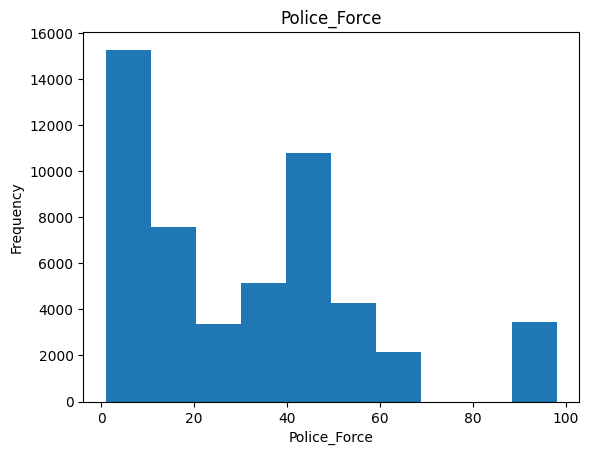

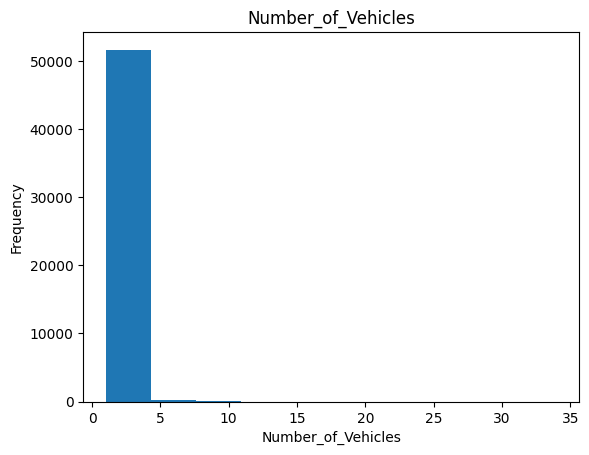

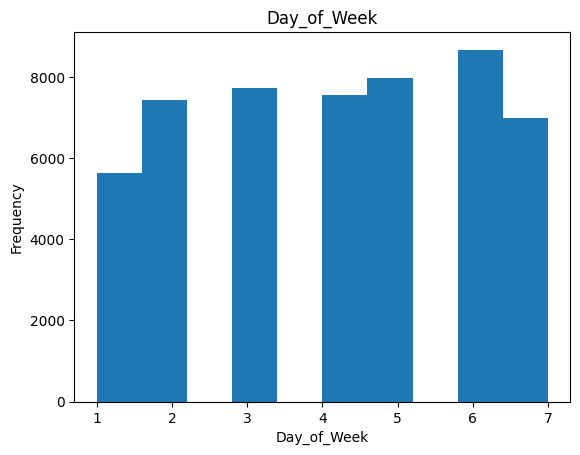

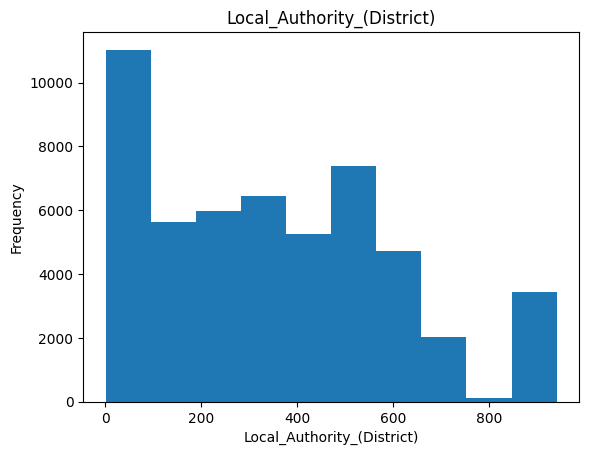

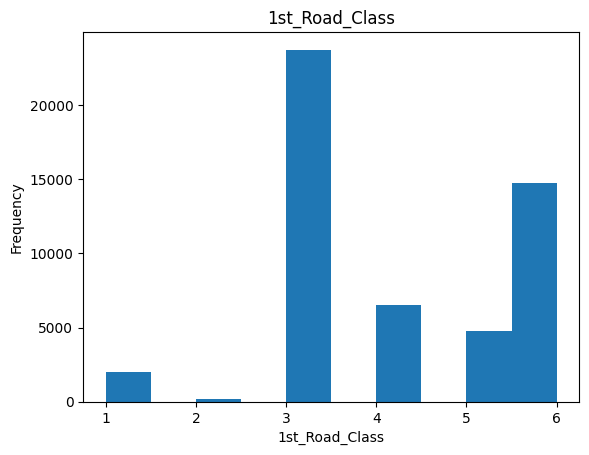

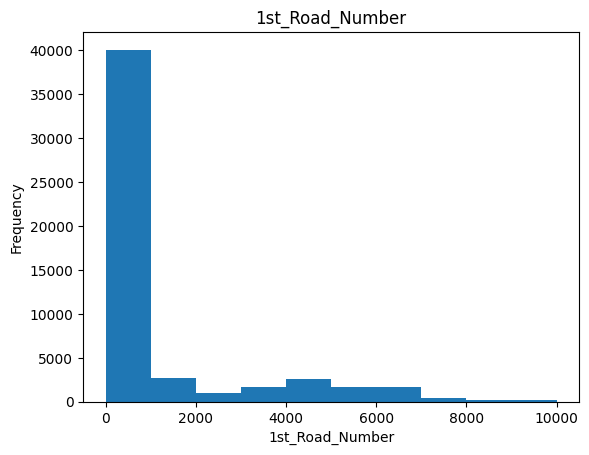

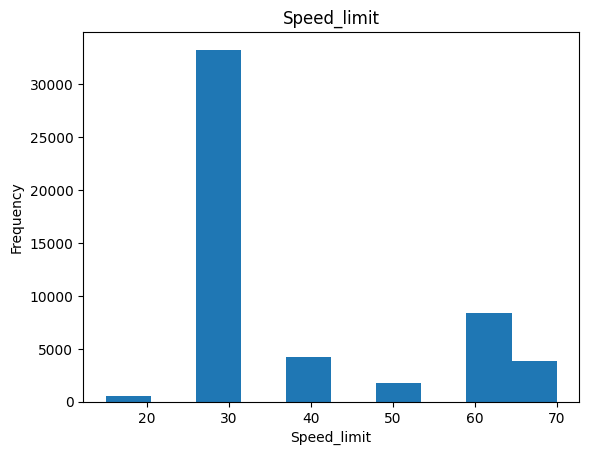

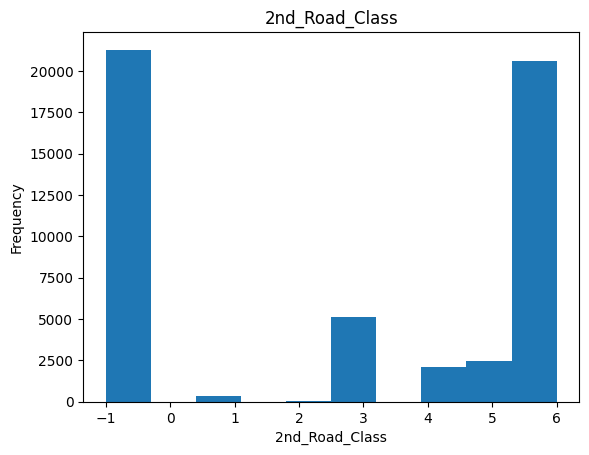

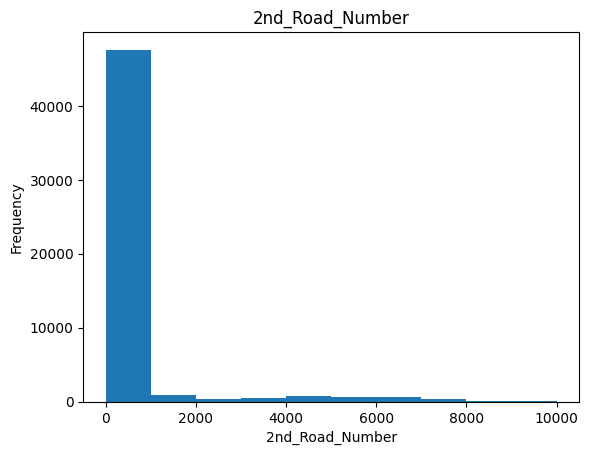

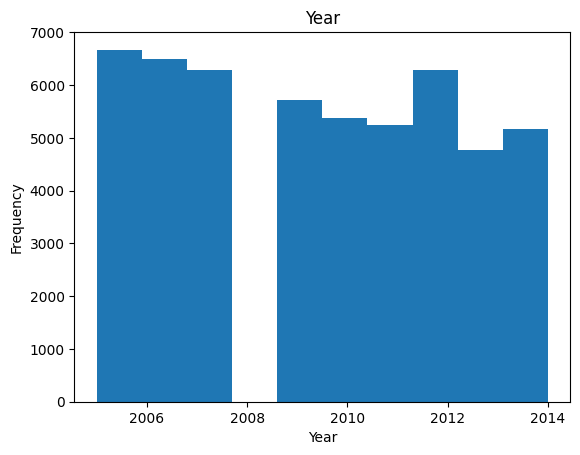

In [154]:
for col in df.columns:
  if df[col].dtype == int:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(col)
    plt.show()

#    plt.bar(df[col], df[col].value_counts, label=bar_labels, color=bar_colors)


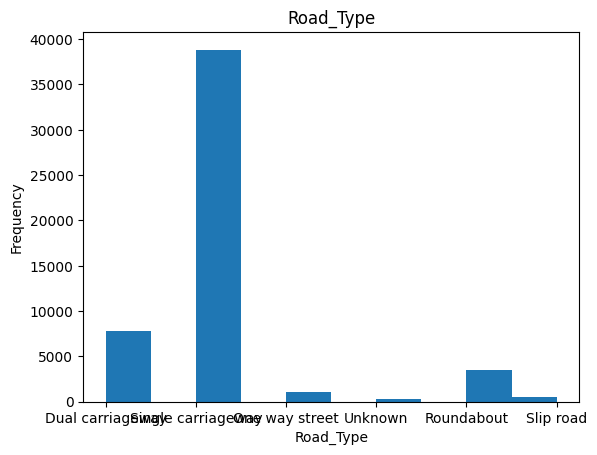

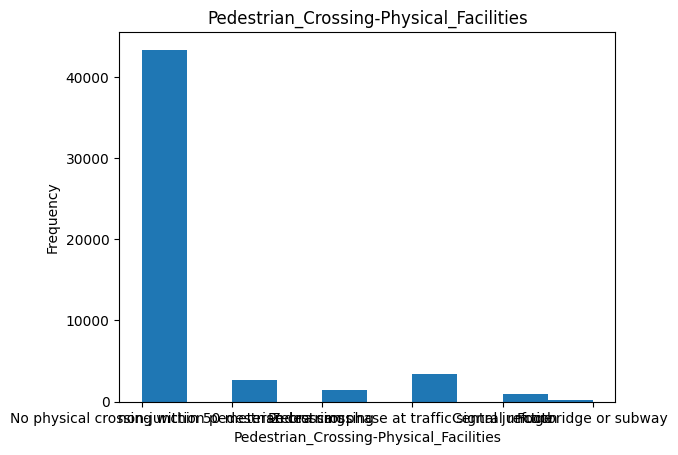

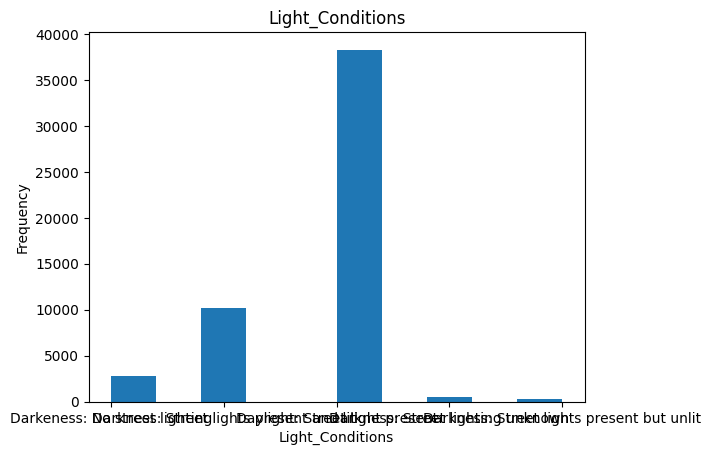

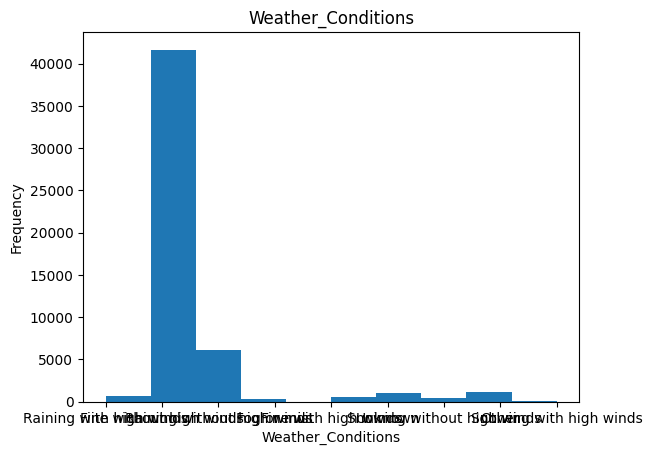

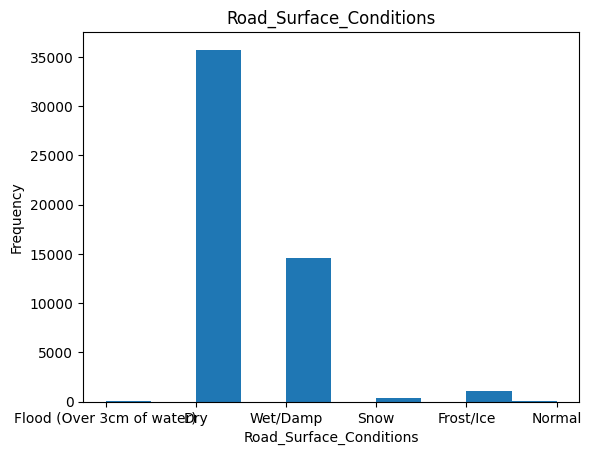

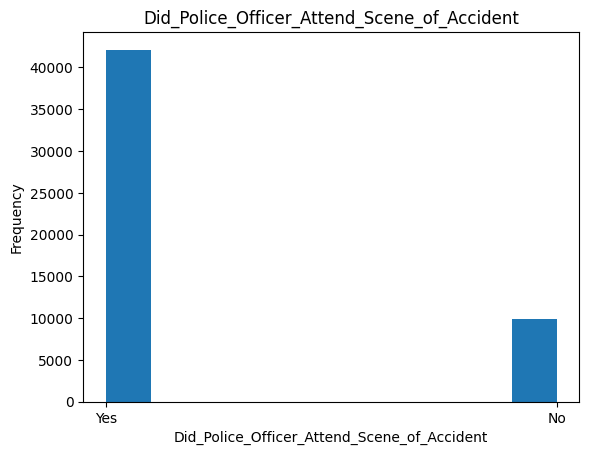

In [160]:
for col in df.columns:
  if df[col].dtype == object:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(col)
    plt.show()


####ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

In [156]:
####ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

In [157]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.838154,1.834327,1.347654,2009-11-29 11:27:54.276923136,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.358788,2009.401788
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,2005-01-01 00:00:00,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2006-12-20 00:00:00,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,2010-03-02 12:00:00,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,2012-07-11 00:00:00,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,2014-12-31 00:00:00,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.401537,0.727856,0.848073,NaN,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479690,3.006997


In [161]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype == object:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [51]:
y = df.copy
removed_outliers = y.between(y.quantile(0.25), y.quantile(.75))

y[removed_outliers].plot().get_figure()

AttributeError: 'function' object has no attribute 'between'

In [162]:
def remove_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  return (~df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)])

df_out = remove_outliers(df)
df_out.describe()

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [175]:
df_corr.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
Location_Easting_OSGR,1.000000,-0.426100,0.999358,-0.428100,-0.355791,0.012201,0.013283,-0.036082,-0.006266,-0.378165,...,-0.056254,0.045012,-0.003933,0.033189,-0.003631,-0.046981,-0.073390,-0.087260,-0.003775,0.032600
Location_Northing_OSGR,-0.426100,1.000000,-0.436512,0.999974,0.176440,-0.030697,-0.041982,0.027285,0.001804,0.128939,...,0.045996,-0.034241,0.019856,-0.005599,-0.006355,0.037321,0.075881,0.050774,0.014268,-0.011934
Longitude,0.999358,-0.436512,1.000000,-0.438409,-0.369331,0.012844,0.014655,-0.034843,-0.006195,-0.388518,...,-0.055575,0.045610,-0.002466,0.031702,-0.003486,-0.047581,-0.073776,-0.085604,-0.004442,0.032355
Latitude,-0.428100,0.999974,-0.438409,1.000000,0.174347,-0.030700,-0.041782,0.027474,0.001804,0.127175,...,0.045712,-0.033955,0.020501,-0.005639,-0.006305,0.037280,0.075827,0.050313,0.014112,-0.012018
Police_Force,-0.355791,0.176440,-0.369331,0.174347,1.000000,-0.033269,-0.015102,0.002784,0.004726,0.981991,...,0.199189,-0.117069,-0.019011,-0.054905,-0.032034,0.040045,0.066855,0.237542,0.006614,-0.031013
Accident_Severity,0.012201,-0.030697,0.012844,-0.030700,-0.033269,1.000000,0.079139,-0.099515,0.015641,-0.033182,...,-0.074525,0.062510,0.024248,0.014689,0.065541,0.035444,0.015170,-0.080318,-0.118443,-0.007606
Number_of_Vehicles,0.013283,-0.041982,0.014655,-0.041782,-0.015102,0.079139,1.000000,0.265410,-0.005239,-0.009094,...,0.080439,0.067722,0.027258,-0.048577,0.096851,-0.007745,-0.011342,0.038004,0.030534,-0.008036
Number_of_Casualties,-0.036082,0.027285,-0.034843,0.027474,0.002784,-0.099515,0.265410,1.000000,0.002814,0.011013,...,0.138827,-0.032316,0.002434,-0.032192,-0.034866,0.019373,0.045146,0.116850,0.105690,-0.014310
Day_of_Week,-0.006266,0.001804,-0.006195,0.001804,0.004726,0.015641,-0.005239,0.002814,1.000000,0.004856,...,-0.015010,0.003579,0.002457,0.007814,-0.002578,-0.003650,-0.003260,-0.015853,-0.002180,-0.000973
Local_Authority_(District),-0.378165,0.128939,-0.388518,0.127175,0.981991,-0.033182,-0.009094,0.011013,0.004856,1.000000,...,0.205801,-0.116678,-0.017620,-0.063915,-0.031312,0.040998,0.067252,0.251184,0.003522,-0.035152


In [ ]:
df_corr = df.drop('Date', axis = 1)
sns.heatmap(df_corr.corr(), annot = True)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        52000 non-null  float64       
 1   Location_Northing_OSGR                       52000 non-null  float64       
 2   Longitude                                    52000 non-null  float64       
 3   Latitude                                     52000 non-null  float64       
 4   Police_Force                                 52000 non-null  int64         
 5   Accident_Severity                            52000 non-null  float64       
 6   Number_of_Vehicles                           52000 non-null  int64         
 7   Number_of_Casualties                         52000 non-null  float64       
 8   Date                                         52000 non-null  datetime64[ns]


In [ ]:
for col in df.columns:
  if df[col].dtype == object:
    print(col, df[col].value_counts())

In [184]:
df.shape

(52000, 23)

In [185]:
df = df.drop('Pedestrian_Crossing-Physical_Facilities', axis = 1)

In [183]:
for col in df.columns:
  print(col, df[col].value_counts())

Location_Easting_OSGR Location_Easting_OSGR
531890.0    16
533650.0    15
531220.0    14
530980.0    13
533370.0    13
            ..
309450.0     1
575400.0     1
503208.0     1
457720.0     1
456682.0     1
Name: count, Length: 30693, dtype: int64
Location_Northing_OSGR Location_Northing_OSGR
181190.0    19
181310.0    17
180920.0    15
179690.0    15
181110.0    14
            ..
310945.0     1
489909.0     1
150650.0     1
809700.0     1
127058.0     1
Name: count, Length: 32580, dtype: int64
Longitude Longitude
-0.100610    5
-0.096159    4
-0.570203    4
-2.948497    4
-0.044780    3
            ..
-5.307961    1
 0.036592    1
-1.505472    1
-1.612575    1
-1.212104    1
Name: count, Length: 50901, dtype: int64
Latitude Latitude
51.515721    5
53.211710    4
53.404118    4
51.570594    4
51.371165    3
            ..
54.017044    1
50.123692    1
51.544534    1
55.009095    1
51.565050    1
Name: count, Length: 50701, dtype: int64
Police_Force Police_Force
1     7813
20    2047


In [187]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].drop(df['Urban_or_Rural_Area']=3.0)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-187-021c8bd014c6>, line 1)

In [176]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

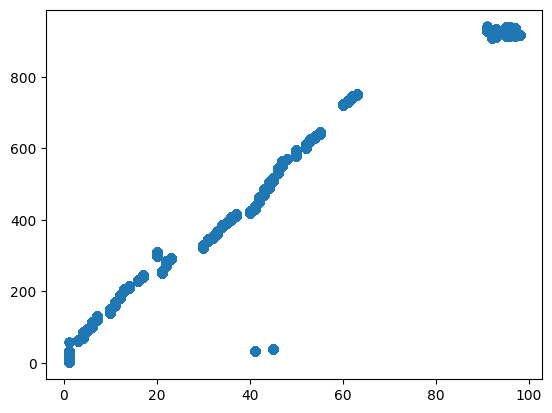

In [179]:
plt.scatter(df['Police_Force'], df['Local_Authority_(District)'])
plt.show()

In [180]:
df = df.drop('Local_Authority_(District)', axis = 1)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [63]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [78]:
df = df.drop('Pedestrian_Crossing-Human_Control', axis = 1)

In [76]:
df_copy['Pedestrian_Crossing-Human_Control'].unique()


for col in df_copy.columns:
  if df_copy[col].dtype == object:
    print(col, df_copy[col].value_counts())

Road_Type Road_Type
Single carriageway    38852
Dual carriageway       7737
Roundabout             3475
One way street         1099
Slip road               542
Unknown                 295
Name: count, dtype: int64
Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Human_Control
None within 50 metres                 51718
Control by other authorised person      163
Control by school crossing patrol       119
Name: count, dtype: int64
Pedestrian_Crossing-Physical_Facilities Pedestrian_Crossing-Physical_Facilities
No physical crossing within 50 meters          43368
Pedestrian phase at traffic signal junction     3455
non-junction pedestrian crossing                2669
Zebra crossing                                  1429
Central refuge                                   924
Footbridge or subway                             155
Name: count, dtype: int64
Light_Conditions Light_Conditions
Daylight: Street light present               37734
Darkness: Street lights present and lit      10130


In [70]:
for col in df_copy.columns:
  if df_copy[col].dtype == object:
    print(col, df_copy[col].unique())

Local_Authority_(Highway) ['E10000011' 'E09000017' 'W06000014' 'E10000017' 'E06000021' 'E10000018'
 'E08000020' 'E08000022' 'S12000006' 'E06000010' 'E08000030' 'E06000049'
 'E08000034' 'E08000009' 'E06000034' 'E08000036' 'E10000023' 'E09000008'
 'E06000016' 'E08000029' 'E09000010' 'W06000024' 'E08000011' 'E10000032'
 'E10000015' 'E10000019' 'E06000037' 'E10000030' 'E08000024' 'E09000032'
 'E08000003' 'E08000007' 'E09000011' 'E06000035' 'E10000020' 'E06000031'
 'S12000043' 'E08000031' 'E10000009' 'S12000036' 'E10000034' 'E06000032'
 'E10000016' 'E06000045' 'E10000014' 'E10000003' 'E10000007' 'E06000051'
 'E10000028' 'E08000010' 'E06000036' 'E09000019' 'E06000019' 'E06000030'
 'E06000033' 'E09000016' 'E10000024' 'E08000032' 'E06000002' 'E10000029'
 'E08000026' 'E08000025' 'E09000006' 'E06000042' 'E06000052' 'E09000003'
 'S12000040' 'E09000023' 'E10000021' 'E09000033' 'E09000005' 'E10000008'
 'E06000055' 'E09000001' 'E09000012' 'E06000048' 'E09000024' 'E09000004'
 'E08000012' 'W06000012' 

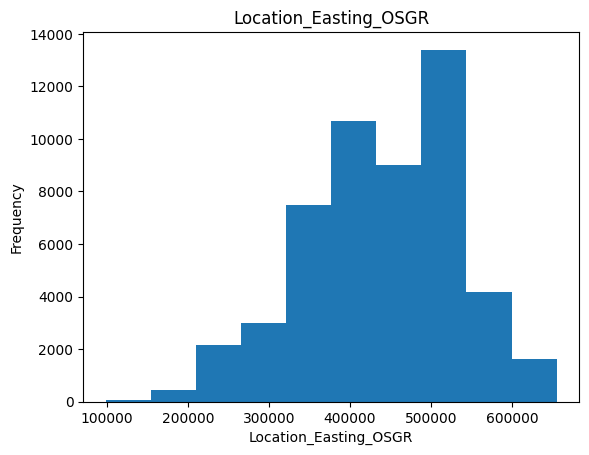

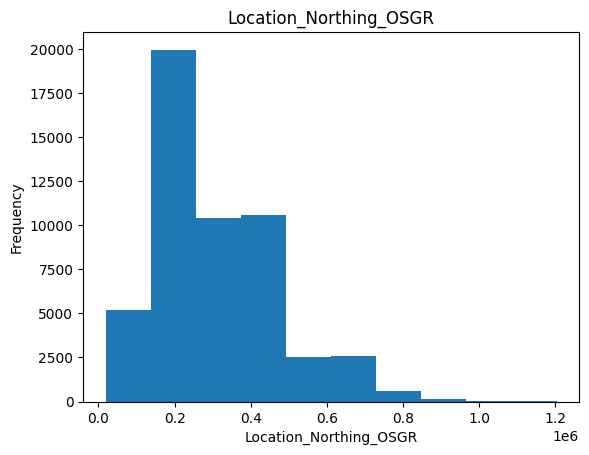

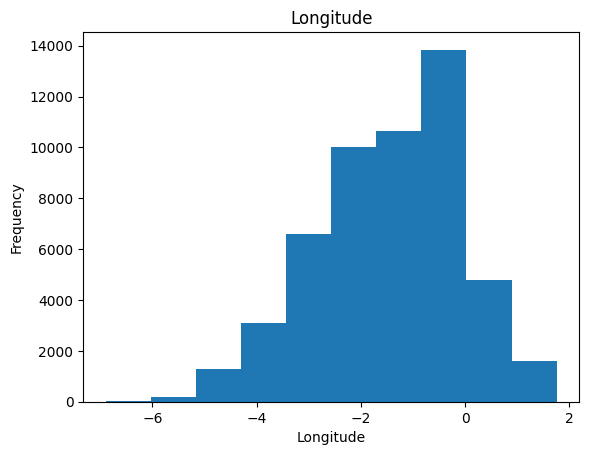

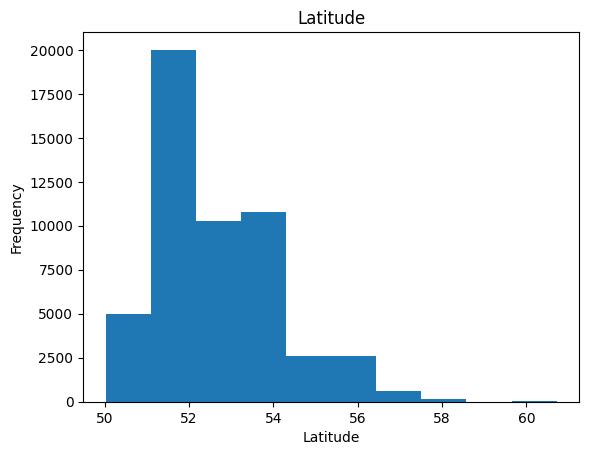

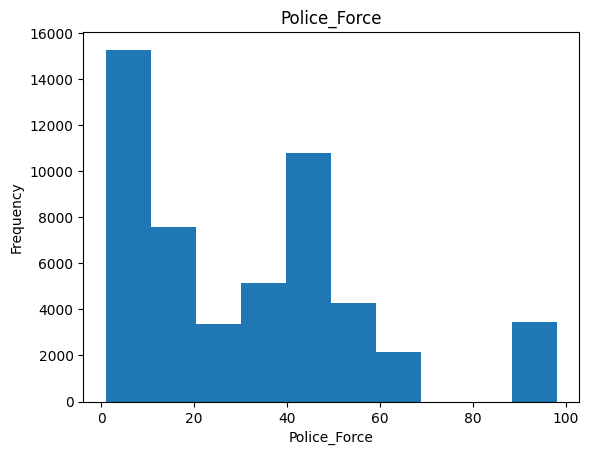

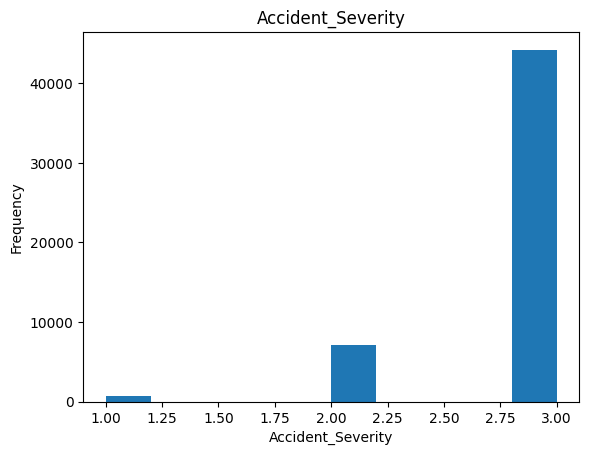

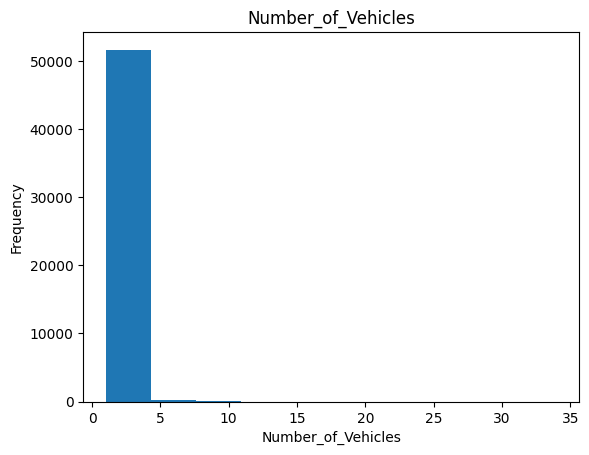

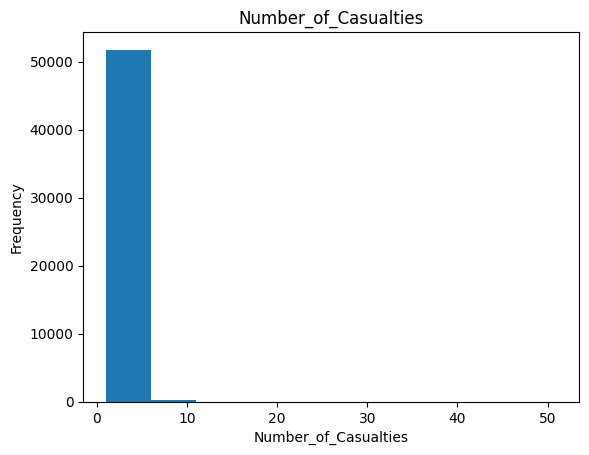

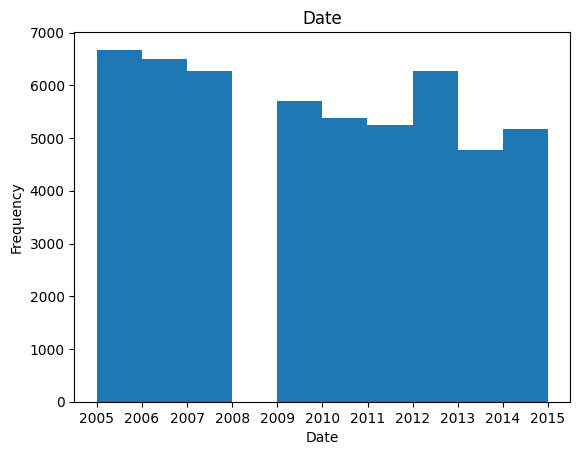

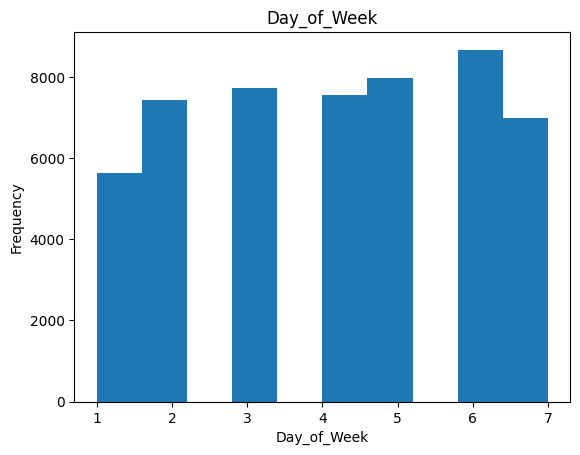

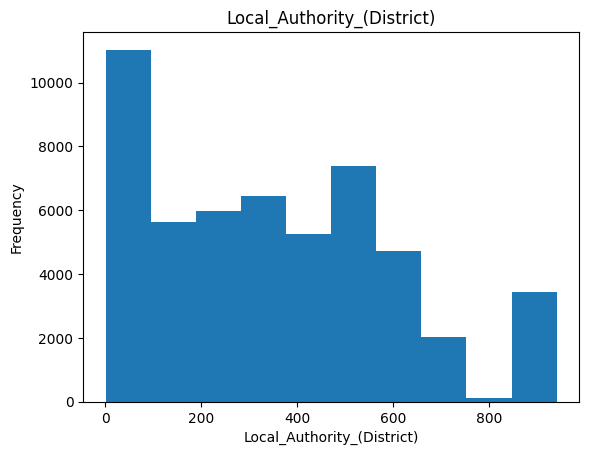

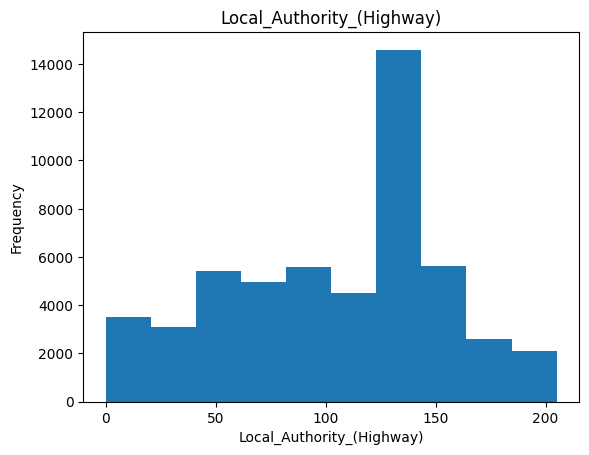

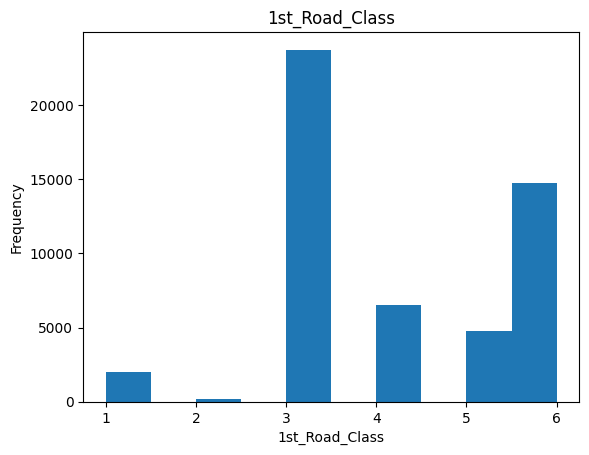

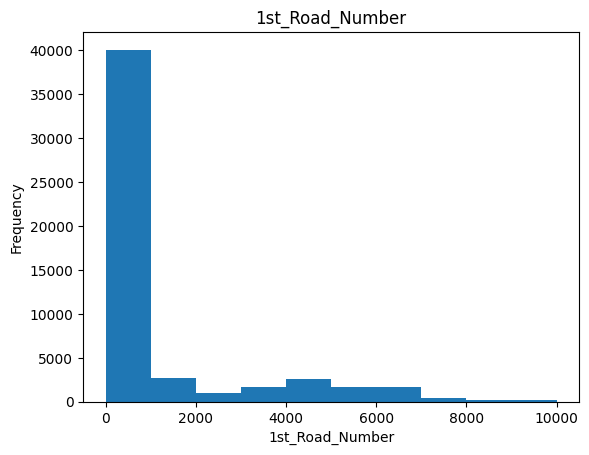

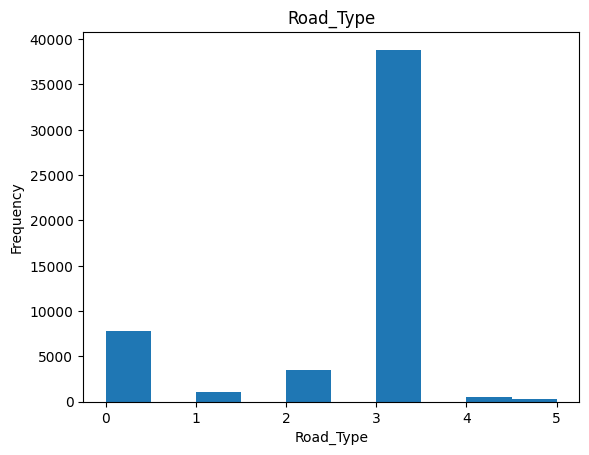

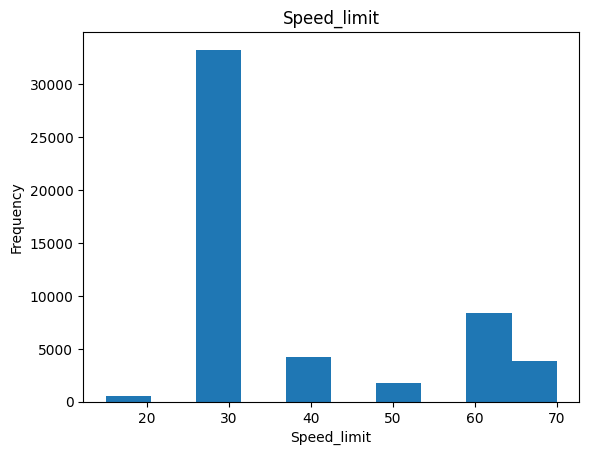

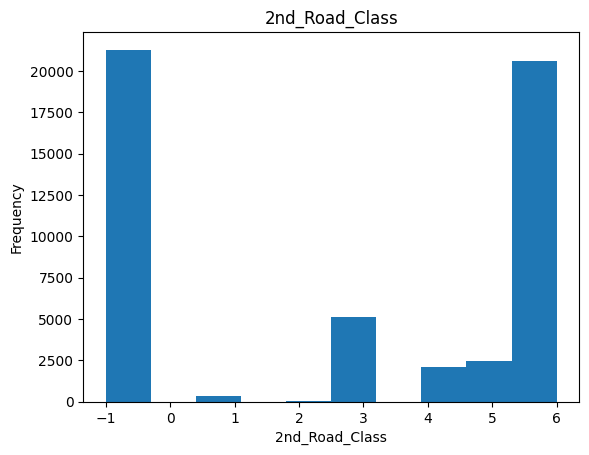

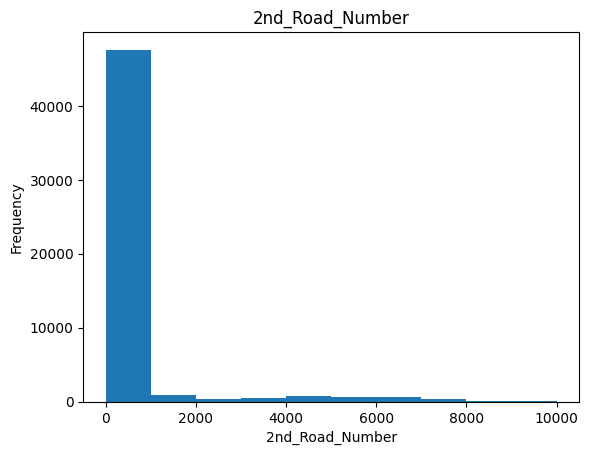

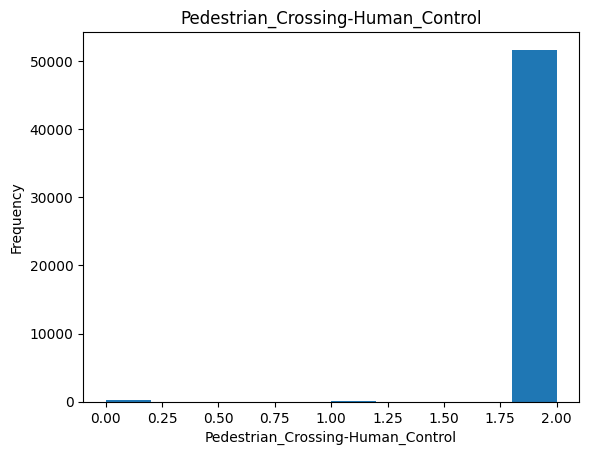

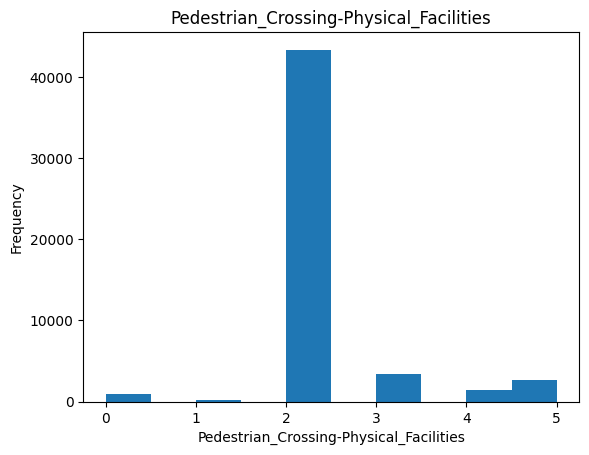

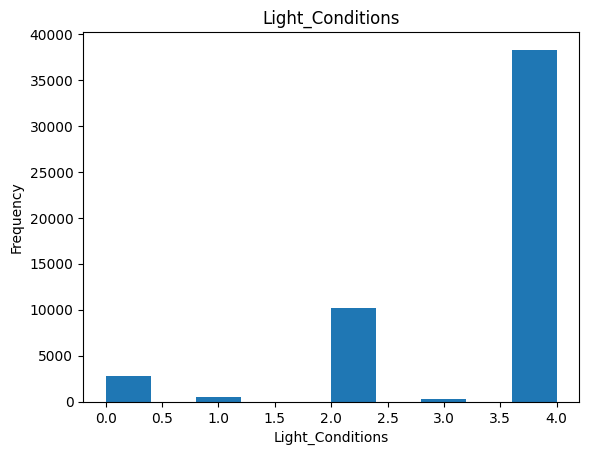

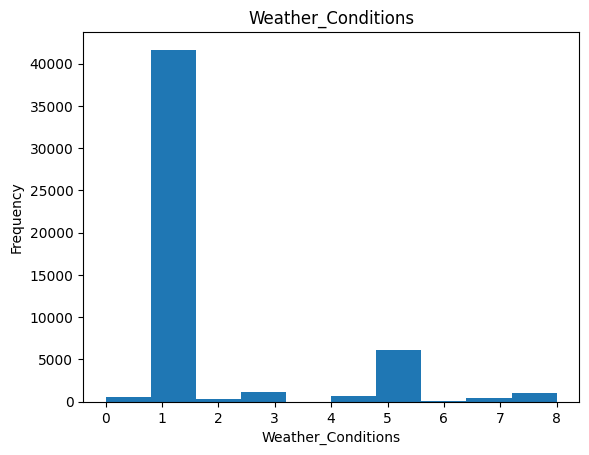

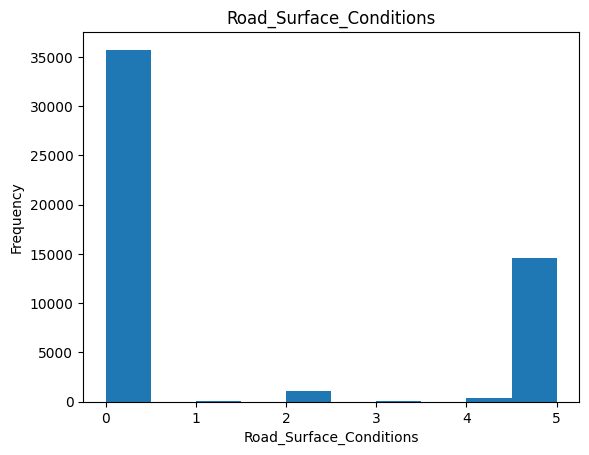

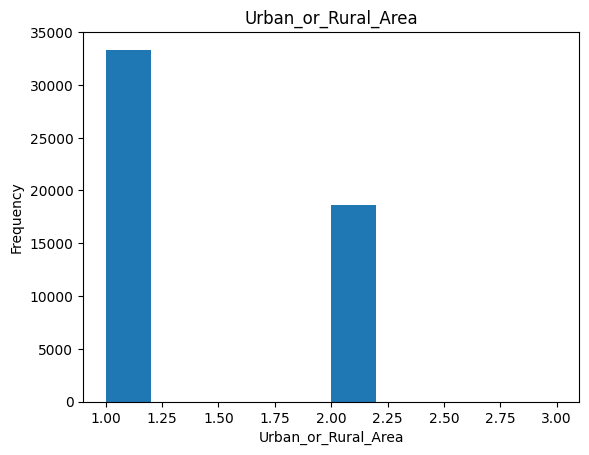

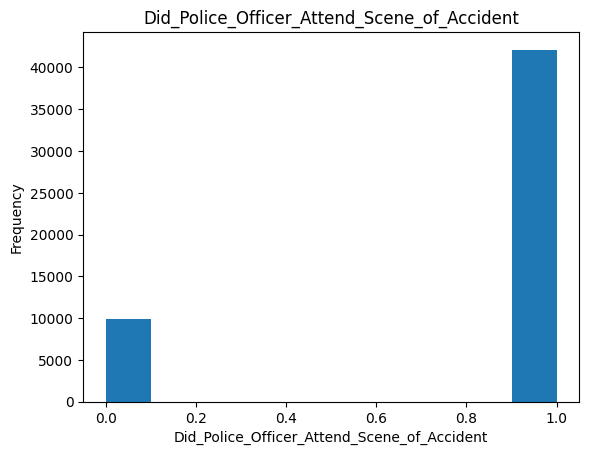

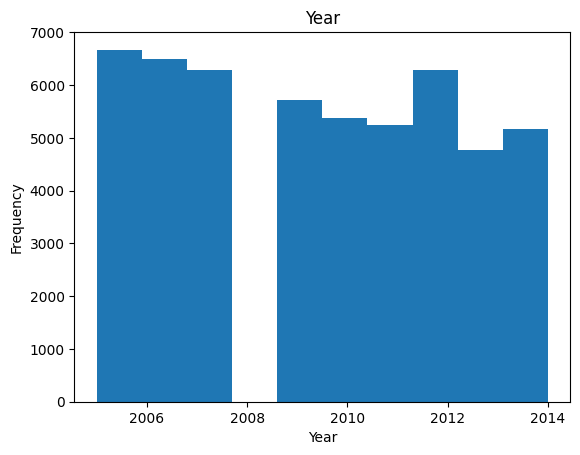

In [57]:
for col in df_copy.columns:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(col)
  plt.show()

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: >

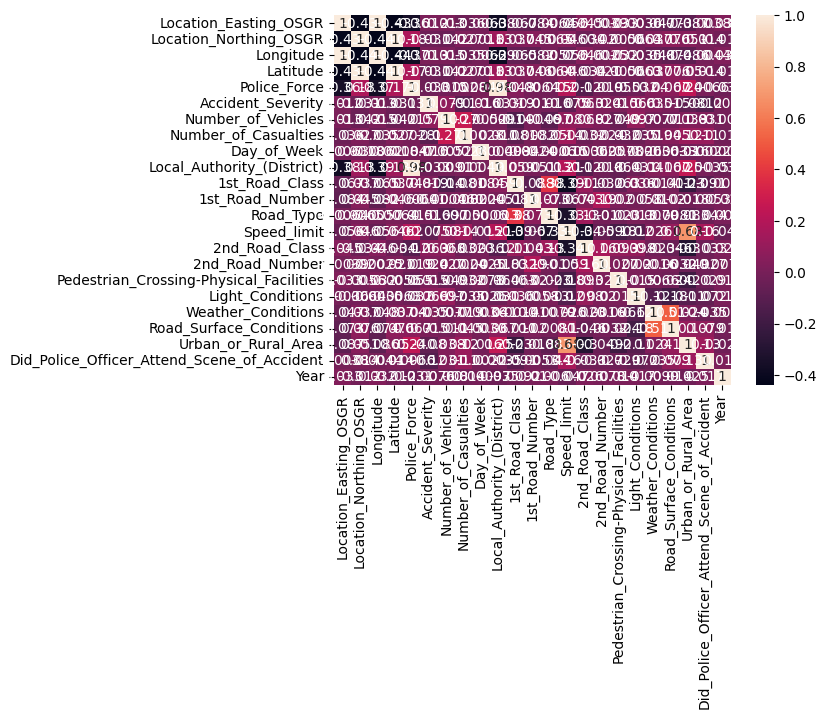

In [163]:
df_corr = df.drop('Date', axis = 1)
sns.heatmap(df_corr.corr(), annot = True)

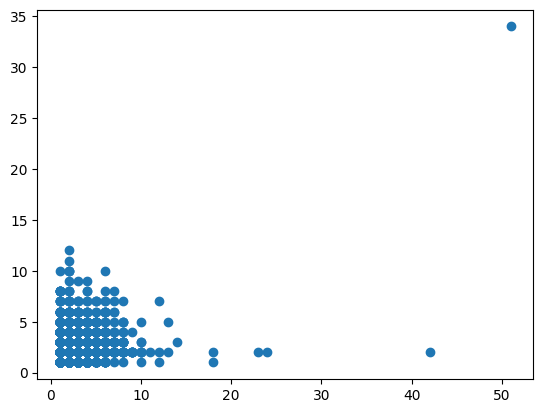

In [166]:
plt.scatter(df['Number_of_Casualties'], df['Number_of_Vehicles'])
plt.show()

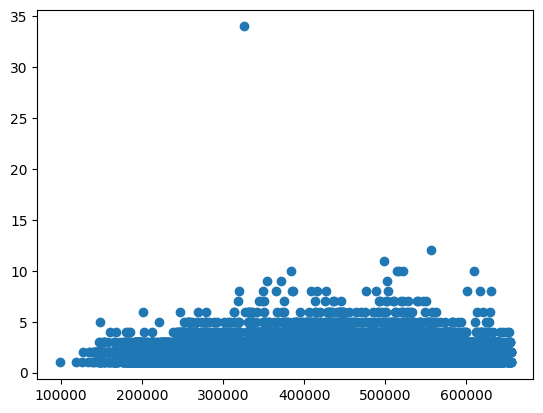

In [169]:
plt.scatter(df['Location_Easting_OSGR'], df['Number_of_Vehicles'])
plt.show()

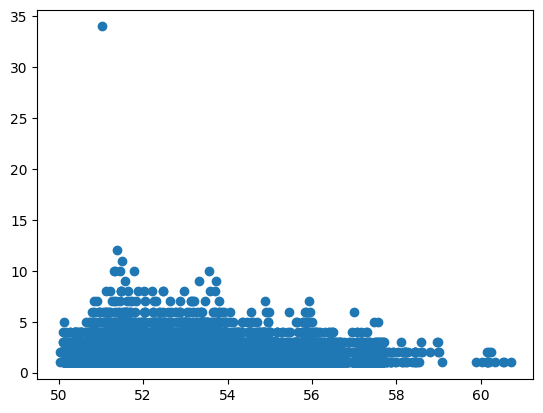

In [168]:
plt.scatter(df['Latitude'], df['Number_of_Vehicles'])
plt.show()

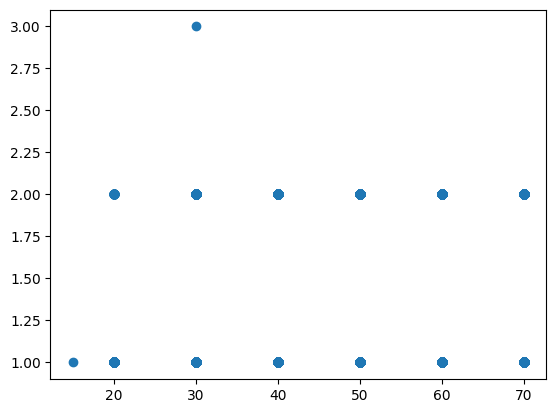

In [178]:
plt.scatter(df['Speed_limit'], df['Urban_or_Rural_Area'])
plt.show()

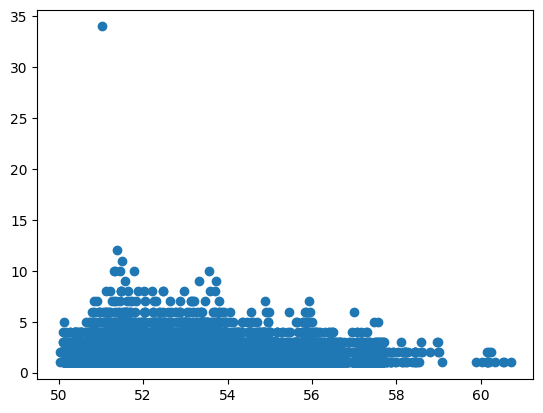

In [174]:
plt.scatter(df['Latitude'], df['Number_of_Vehicles'])
plt.show()

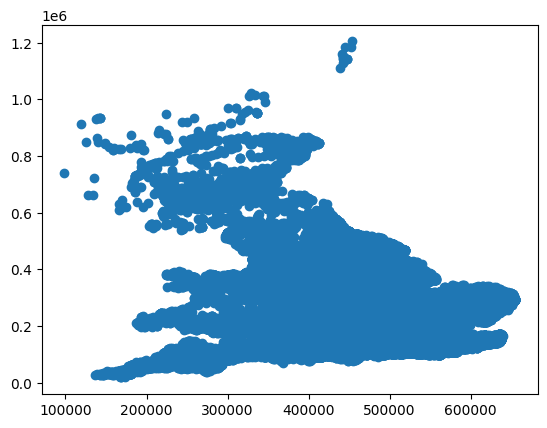

In [177]:
plt.scatter(df['Location_Easting_OSGR'], df['Location_Northing_OSGR'])
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('Date', axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA()

param_grid = {
    'n_components': [2, 3, 4, 5]
}
grid = GridSearchCV(pca, param_grid)
grid.fit(X)
print(grid.best_params_)

{'n_components': 5}


In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('Date', axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

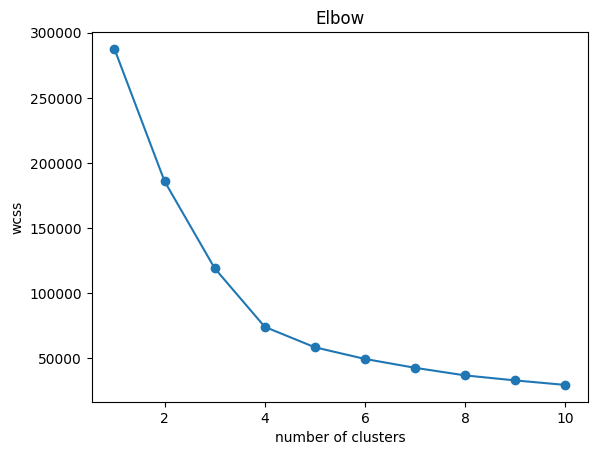

In [221]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('Elbow')
plt.show()

In [230]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(X)
centers = km.cluster_centers_
labels = km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [232]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)

0.46850218223594575


## Plot the data points with their predicted cluster center

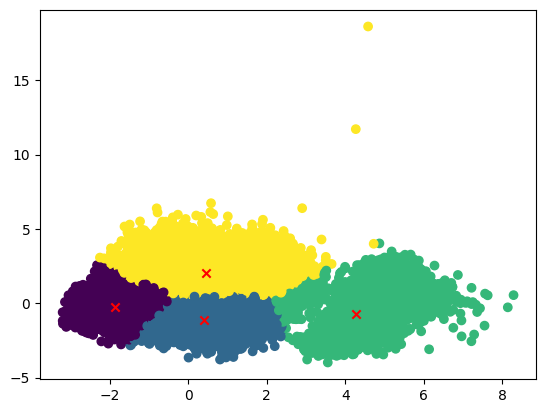

In [231]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', marker='x')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
   I did PCA and feature engineering, I choose the most correlation features
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   By the elbow graph I choose 3 clusters
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   silhouette_score, because it's the one suitable for unsupervised learning to measure
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   if the silhouette_score is high, it means the distances of the clusters accurate and convinient
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

   - remove the outliers
   - remove the unnecessary features
   - do PCA and gridsearch for the best number of components
   - Try to Apply DGSCAN